***Project: Banglore House Prediction using ML and Auto SK Learn***


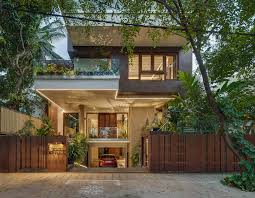

In [59]:
#import necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib

In [60]:
df=pd.read_csv('/content/bengaluru_house_prices.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [61]:
df.shape

(13320, 9)

In [62]:
df['area_type'].value_counts()

,count
area_type,
Super built-up Area,8790
Built-up Area,2418
Plot Area,2025
Carpet Area,87


In [63]:
df2=df.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape

(13320, 5)

In [64]:
df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [65]:
df3=df2.dropna()

In [66]:
df3.shape

(13246, 5)

In [67]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.bhk.unique()

/tmp/ipython-input-2716584372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [68]:
def convert_sqft_to_num(x):
  tokens=x.split('-')
  if len(tokens)==2:
    return(float(tokens[0])+float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None

In [69]:
df4=df3.copy()
df4.total_sqft=df4.total_sqft.apply(convert_sqft_to_num)
df4=df4[df4.total_sqft.notnull()]
df4.head(2)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4


In [70]:
df5=df4.copy()
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [71]:
df5.to_csv("bhp.csv",index=False)

In [72]:
df5.location=df5.location.apply(lambda x: x.strip())
Location_stats=df5['location'].value_counts(ascending=False)
Location_stats

,count
location,
Whitefield,533
Sarjapur Road,392
Electronic City,304
Kanakpura Road,264
Thanisandra,235
...,...
Zuzuvadi,1
Chellikere,1
Jakkasandra,1


In [73]:
Location_stats.values.sum()

np.int64(13200)

In [74]:
len(Location_stats[Location_stats>10])

240

In [75]:
len(Location_stats)

1287

In [76]:
location_stats_lessthan_10= Location_stats[Location_stats>10]

In [77]:
df5.location=df5.location.apply(lambda x: 'other' if x in location_stats_lessthan_10 else x)
len(df5.location.unique())

1048

In [78]:
df5[df5.total_sqft/df5.bhk<300].head()
df5.shape

(13200, 7)

In [79]:
df5.price_per_sqft.describe()

,price_per_sqft
count,1.320000e+04
mean,7.920759e+03
std,1.067272e+05
min,2.678298e+02
25%,4.267701e+03
50%,5.438331e+03
75%,7.317073e+03
max,1.200000e+07


In [80]:
from os import remove
def remove_pps_outliers(df):
  df_out=pd.DataFrame()
  for key,subdf in df.groupby('location'):
    m=np.mean(subdf.price_per_sqft)
    st=np.std(subdf.price_per_sqft)
    reduced_df=subdf[(subdf.price_per_sqft>(m-st))& (subdf.price_per_sqft<=(m+st))]
    df_out=pd.concat([df_out,reduced_df],ignore_index=True)
  return df_out
df6=remove_pps_outliers(df5)
df6.shape

(11832, 7)

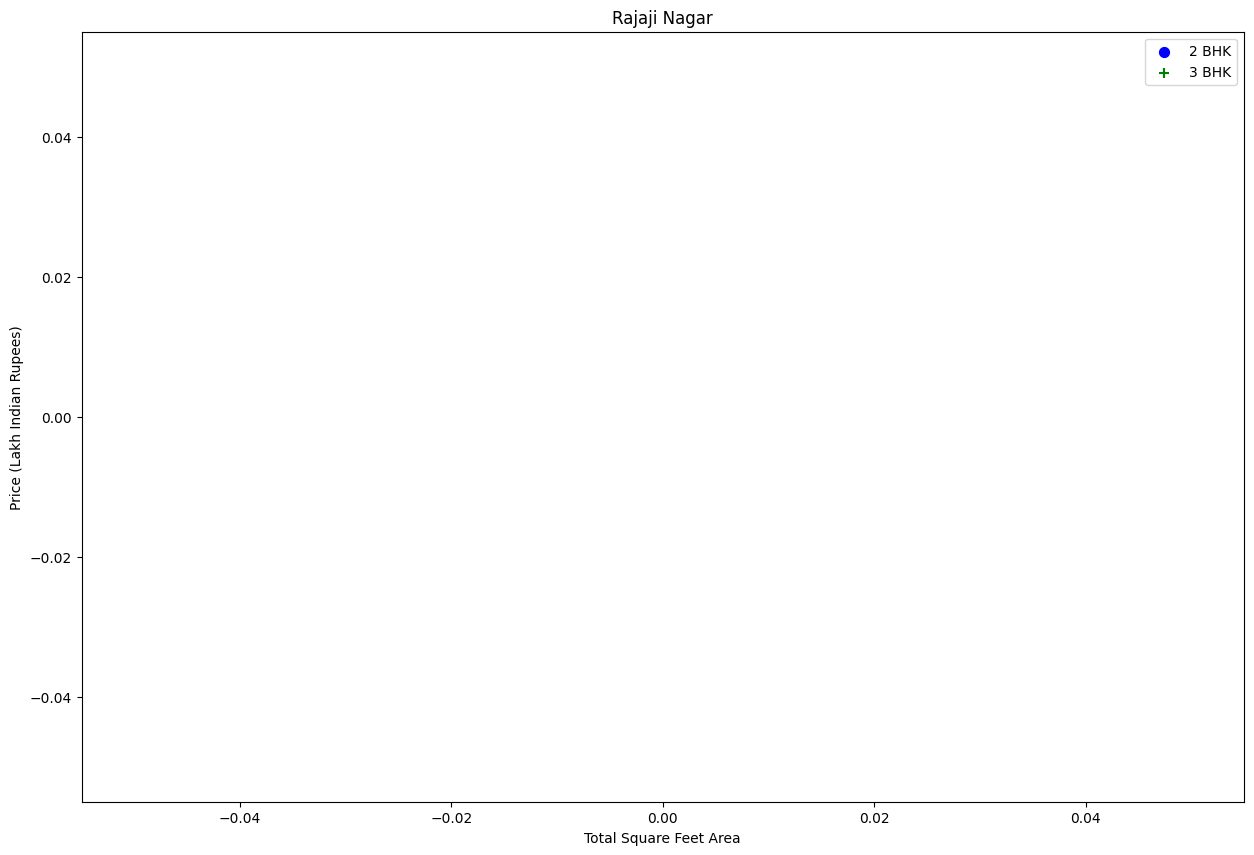

In [81]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df6,"Rajaji Nagar")

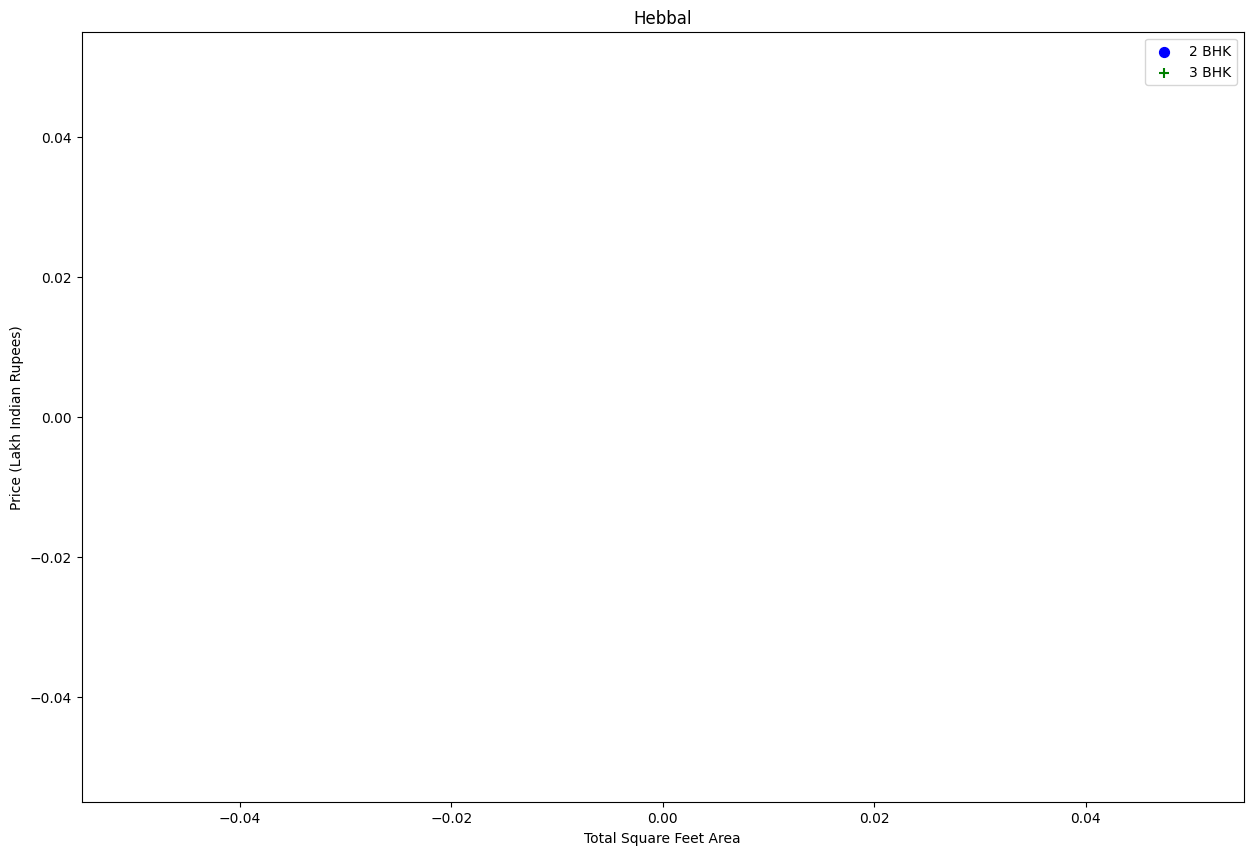

In [82]:
plot_scatter_chart(df6,"Hebbal")

Text(0, 0.5, 'Count')

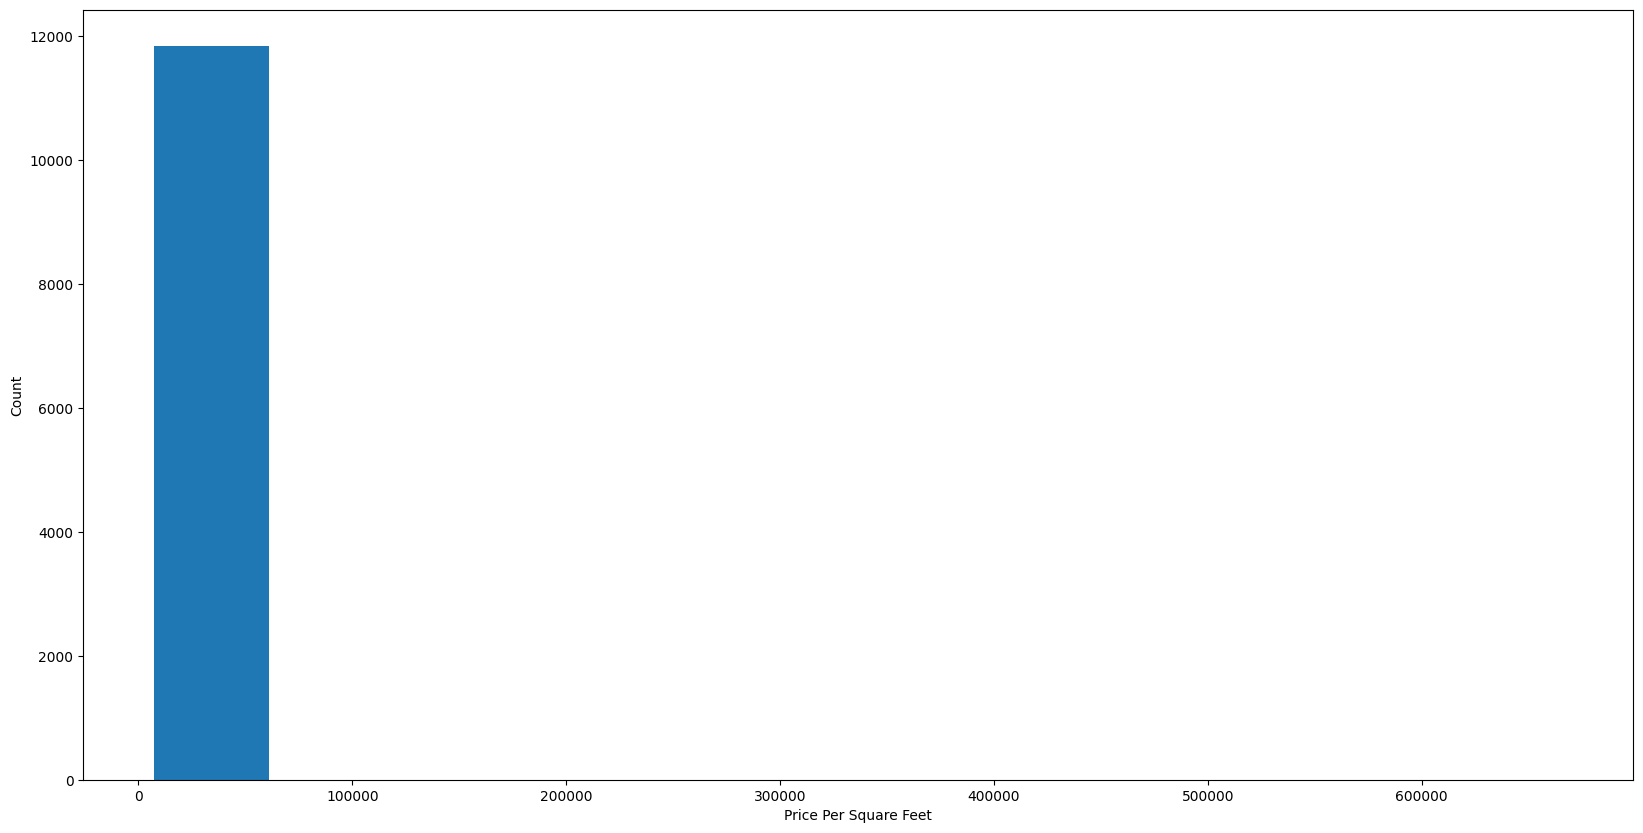

In [83]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df6.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [84]:
df6.bath.unique()

array([ 3.,  1.,  4.,  7.,  2.,  5.,  6.,  8.,  9., 14., 10., 12., 11.,
       40., 13.])

Text(0, 0.5, 'Count')

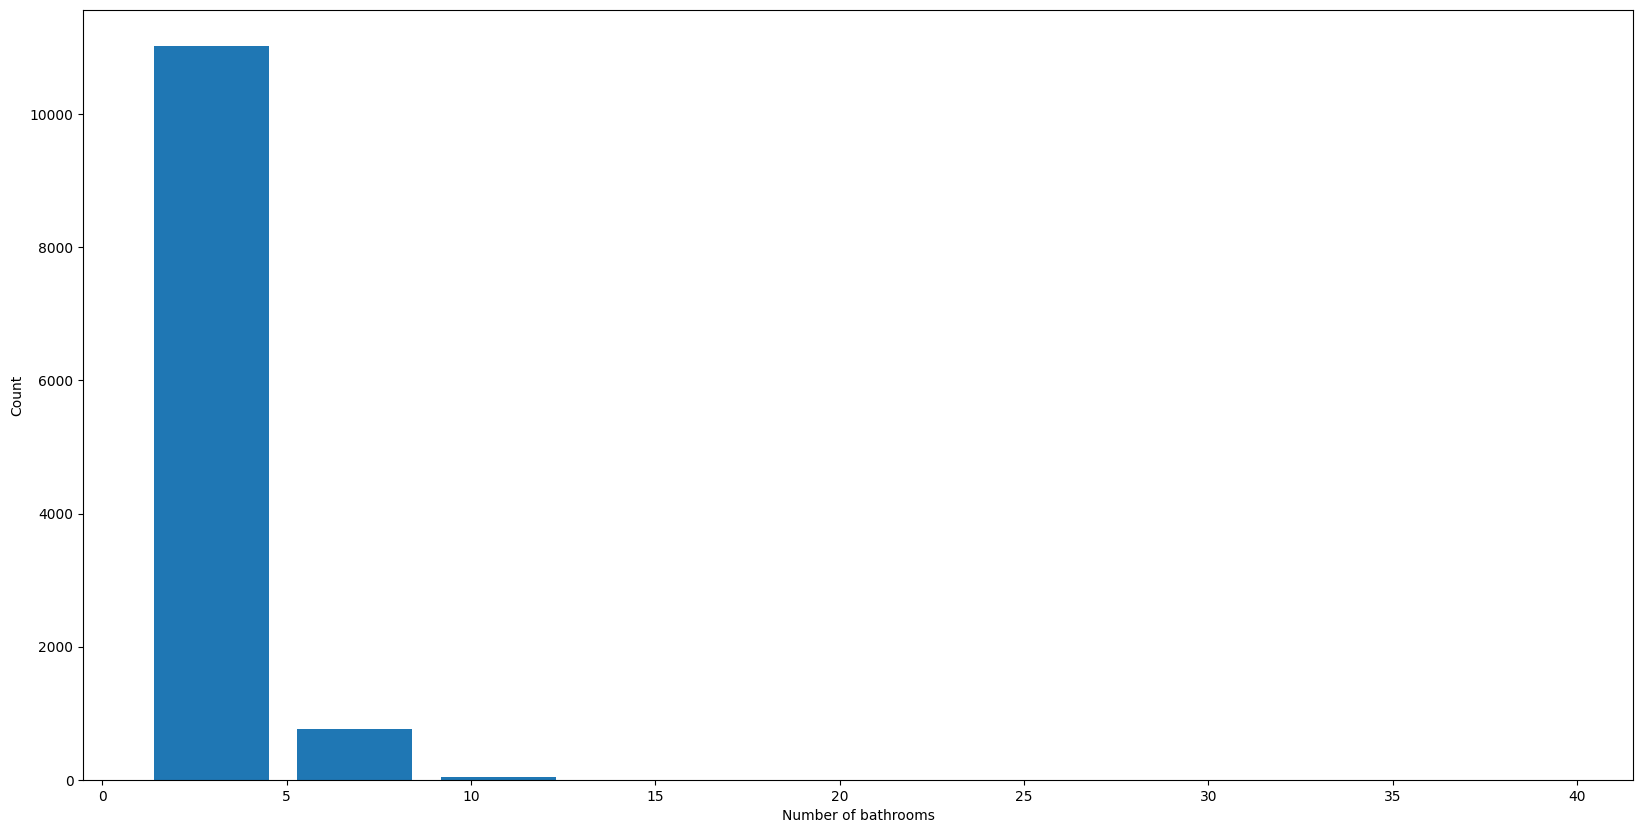

In [85]:
plt.hist(df6.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [86]:
df6[df6.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
196,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
1491,Wilson Garden,8 Bedroom,1850.0,12.0,300.0,8,16216.216216
2212,other,9 Bedroom,1260.0,11.0,290.0,9,23015.873016
2996,other,8 Bedroom,1200.0,12.0,110.0,8,9166.666667
5116,other,43 Bedroom,2400.0,40.0,660.0,43,27500.000000
6875,other,9 Bedroom,2600.0,12.0,675.0,9,25961.538462
8191,other,10 BHK,4000.0,12.0,160.0,10,4000.000000
9799,other,9 Bedroom,1200.0,13.0,150.0,9,12500.000000
10136,other,10 Bedroom,1200.0,11.0,105.0,10,8750.000000


In [87]:
df6[df6.bath<df6.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block BEL Layout,3 BHK,1540.0,3.0,85.0,3,5519.480519
1,1st Block HBR Layout,1 BHK,600.0,1.0,45.0,1,7500.000000
2,1st Block HBR Layout,4 BHK,3150.0,4.0,150.0,4,4761.904762
3,1st Block HRBR Layout,8 Bedroom,1200.0,7.0,235.0,8,19583.333333
4,1st Block HRBR Layout,7 Bedroom,2400.0,7.0,355.0,7,14791.666667
...,...,...,...,...,...,...,...
11827,other,1 BHK,550.0,1.0,17.0,1,3090.909091
11828,south,3 Bedroom,2400.0,2.0,480.0,3,20000.000000
11829,tc.palya,2 Bedroom,880.0,2.0,48.0,2,5454.545455
11830,tc.palya,2 Bedroom,1000.0,2.0,55.0,2,5500.000000


In [88]:
df7=df6[df6.bath<df6.bhk+2]
df7.shape

(11682, 7)

In [89]:
df8=df7.drop(['size','price_per_sqft'],axis='columns')
df8.head(3)


,location,total_sqft,bath,price,bhk
0,1st Block BEL Layout,1540.0,3.0,85.0,3
1,1st Block HBR Layout,600.0,1.0,45.0,1
2,1st Block HBR Layout,3150.0,4.0,150.0,4


In [90]:
dummies = pd.get_dummies(df8.location)
dummies.head(3)

,1st Block BEL Layout,1st Block HBR Layout,1st Block HRBR Layout,1st Block Koramangala,1st Stage Indira Nagar,2nd Block Hrbr Layout,2nd Block Jayanagar,2nd Phase JP Nagar,2nd Stage Arekere Mico Layout,3rd Block Banashankari,...,"Whitefield,",Wilson Garden,Yarandahalli,Yemlur,Yeshwanthpur Industrial Suburb,frazertown,manyata park,other,south,tc.palya
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [91]:
df9 = pd.concat([df8,dummies.drop('other',axis='columns')],axis='columns')
df9.head()

,location,total_sqft,bath,price,bhk,1st Block BEL Layout,1st Block HBR Layout,1st Block HRBR Layout,1st Block Koramangala,1st Stage Indira Nagar,...,Weavers Colony,"Whitefield,",Wilson Garden,Yarandahalli,Yemlur,Yeshwanthpur Industrial Suburb,frazertown,manyata park,south,tc.palya
0,1st Block BEL Layout,1540.0,3.0,85.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block HBR Layout,600.0,1.0,45.0,1,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block HBR Layout,3150.0,4.0,150.0,4,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block HRBR Layout,1200.0,7.0,235.0,8,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block HRBR Layout,2400.0,7.0,355.0,7,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [92]:
df10 = df9.drop('location',axis='columns')
df10

,total_sqft,bath,price,bhk,1st Block BEL Layout,1st Block HBR Layout,1st Block HRBR Layout,1st Block Koramangala,1st Stage Indira Nagar,2nd Block Hrbr Layout,...,Weavers Colony,"Whitefield,",Wilson Garden,Yarandahalli,Yemlur,Yeshwanthpur Industrial Suburb,frazertown,manyata park,south,tc.palya
0,1540.0,3.0,85.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,600.0,1.0,45.0,1,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3150.0,4.0,150.0,4,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,7.0,235.0,8,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2400.0,7.0,355.0,7,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11827,550.0,1.0,17.0,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11828,2400.0,2.0,480.0,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
11829,880.0,2.0,48.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
11830,1000.0,2.0,55.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [93]:
X=df10.drop(['price'],axis='columns')
y=df10.price

In [94]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [95]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.48359178326100716

In [96]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.41907126, 0.54941926, 0.5122256 , 0.34364413, 0.4784873 ])

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model(X,y):
  algos={
      'linear_regression':{
          'model':LinearRegression(),
          'params':{
              #'normalize':[True,False]
          }
      },
      'Lasso':{
          'model':Lasso(),
          'params':{
              'alpha':[1,2],
              'selection':['random','cyclic']
          }
      },
      'decison_tree':{
          'model':DecisionTreeRegressor(),
          'params':{
              'criterion':['mse','friedman_mse'],
              'splitter':['best','random']

          }
      }

  }

  scores=[]
  cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  for algo_name, config in algos.items():
      gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
      gs.fit(X,y)
      scores.append({
          'model': algo_name,
          'best_score': gs.best_score_,
          'best_params': gs.best_params_
      })

  return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model(X,y)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_

,model,best_score,best_params
0,linear_regression,0.460570,{}
1,Lasso,0.420729,"{'alpha': 1, 'selection': 'random'}"
2,decison_tree,0.500771,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [98]:
pred=lr_clf.predict(X_test)

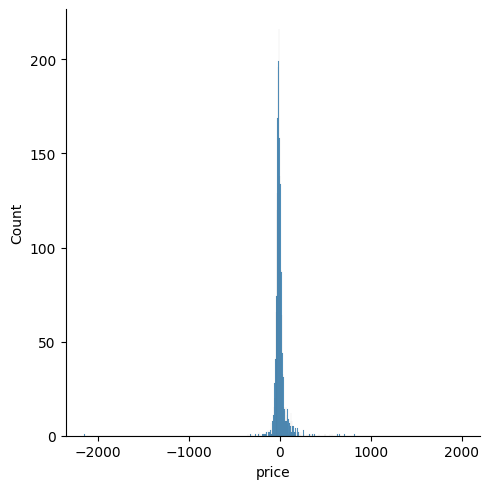

In [99]:
import seaborn as sns
sns.displot(y_test-pred)

In [ ]:
!apt-get install swig -y
!pip install Cython numpy
!pip install auto-sklearn

In [ ]:
import autosklearn
import autosklearn.regression as reg

In [ ]:
X_train.shape

In [ ]:
automl = reg.AutoSklearnRegressor(time_left_for_this_task=120,per_run_time_limit=30)

In [ ]:
automl.fit(X_train,y_train)

In [ ]:
print(automl.leaderboard())

In [ ]:
print(automl.show_models())

In [ ]:
ypred2= automl.predict(X_test)
ypred2

In [ ]:
import seaborn as sns
plt.style.use("ggplot")
plt.figure(figsize=(12,8))
sns.distplot(y_test-ypred2)
plt.show()

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, ypred2))
print('MSE:', metrics.mean_squared_error(y_test, ypred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ypred2)))

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
print('R2',metrics.r2_score(y_test,ypred2))